In [2]:
# import tensorflow as tf
# print('tensorflow version:',tf.__version__)
# from tensorflow.python.compiler.mlcompute import mlcompute
# mlcompute.set_mlc_device(device_name='gpu') # Available options are 'cpu', 'gpu', and 'any'.
# tf.config.run_functions_eagerly(False)
# print(tf.executing_eagerly())
import tensorflow as tf
from tensorflow.python.compiler.mlcompute import mlcompute
mlcompute.set_mlc_device(device_name='gpu')
tf.config.run_functions_eagerly(False)

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
start='2016-01-01'
end='2021-05-13'

In [5]:
df= web.DataReader('TCS.NS', data_source='yahoo', start=start, end=end)

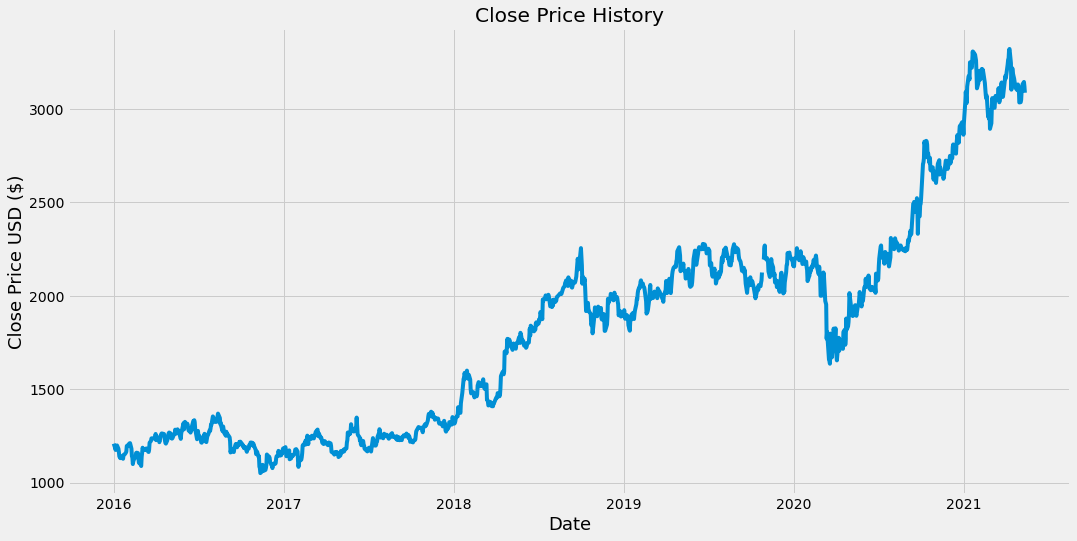

In [6]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
# Create a new df with only close col
data= df.filter(['Close'])
dataset = data.values

# get the number of rows to train the model lstm
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1058

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# scaled_data

In [9]:
offset = 30

In [10]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(offset, len(train_data)):
    x_train.append(train_data[i-offset:i, 0])
    y_train.append(train_data[i, 0])
    # if i <= 61:
    #     print(x_train)
    #     print(y_train)
    #     print()

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1028, 30, 1)

In [13]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (offset,1)))

model.add(LSTM(50, return_sequences=False,))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1028/1028 [==============================] - 7s 7ms/step - loss: nan


In [16]:
# Create testing dataset
test_data = scaled_data[training_data_len - offset:,  :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(offset, len(test_data)):
  x_test.append(test_data[i-offset:i, 0])

In [21]:
x_test

array([[[0.47298803],
        [0.46920223],
        [0.40576887],
        ...,
        [0.33810957],
        [0.30245306],
        [0.31647354]],

       [[0.46920223],
        [0.40576887],
        [0.39755906],
        ...,
        [0.30245306],
        [0.31647354],
        [0.36434571]],

       [[0.40576887],
        [0.39755906],
        [0.3166276 ],
        ...,
        [0.31647354],
        [0.36434571],
        [0.33806556]],

       ...,

       [[0.92091743],
        [0.91145305],
        [0.88669158],
        ...,
        [0.90027181],
        [0.90720502],
        [0.91664737]],

       [[0.91145305],
        [0.88669158],
        [0.88754996],
        ...,
        [0.90720502],
        [0.91664737],
        [0.92219398]],

       [[0.88669158],
        [0.88754996],
        [0.92793866],
        ...,
        [0.91664737],
        [0.92219398],
        [0.91211335]]])

In [17]:
x_test = np.array(x_test)

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
model.predict(x_test)

ValueError: not enough values to unpack (expected 2, got 1)

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
# RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

ValueError: operands could not be broadcast together with shapes (9,1) (264,1) 

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

In [ ]:
apple_quote = web.DataReader('TCS.NS', data_source='yahoo',
                             start=start, 
                             end=end)

new_df = apple_quote.filter(['Close'])

last_offset_days = new_df[-offset:].values

last_offset_days_scaled = scaler.transform(last_offset_days)

X_test = []
X_test.append(last_offset_days_scaled)
X_test = np.array(X_test)

#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], 
                             X_test.shape[1], 
                             1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
 apple_quote2 = web.DataReader('TCS.NS', 
                               data_source='yahoo',
                               start='2021-05-13',
                               end='2021-05-13')

In [ ]:
print(apple_quote2['Close'])